In [1]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [4]:
my_retail_data = pd.read_excel(r"Online Retail.xlsx")

In [5]:
my_retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
# EDA

In [7]:
my_retail_data['Description'] = my_retail_data['Description'].str.strip()
my_retail_data.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
my_retail_data['InvoiceNo'] = my_retail_data['InvoiceNo'].astype('str')
my_retail_data = my_retail_data[~my_retail_data['InvoiceNo'].str.contains('C')]
my_retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
my_retail_data['Country'].value_counts()

Country
United Kingdom          487622
Germany                   9042
France                    8408
EIRE                      7894
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Unspecified                446
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58


In [9]:
# Seperating transactions for UK

In [33]:
mybasket = (
    my_retail_data[my_retail_data['Country'] == "Germany"].groupby(['InvoiceNo', 'Description'])['Quantity'].
    sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
)

In [34]:
mybasket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Covert all positive values to 1 and others are 0

In [35]:
def my_encode_units(x):
    if x <= 0:
        return 0
    if x >=1:
        return 1

my_basket_sets = mybasket.applymap(my_encode_units)
my_basket_sets.drop('POSTAGE', inplace=True, axis=1)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3108\1315031459.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  my_basket_sets = mybasket.applymap(my_encode_units)


In [14]:
# Generating frequent items

In [36]:
my_frequent_items = apriori(my_basket_sets, min_support=0.07, use_colnames=True)

C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [16]:
# Generating Rules

In [37]:
my_rules = association_rules(my_frequent_items, metric='lift', min_threshold=1)

In [18]:
#Viewing top 100 rules

In [38]:
my_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(PLASTERS IN TIN WOODLAND ANIMALS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.137856,0.245077,0.074398,0.539683,2.202098,1.0,0.040613,1.640006,0.633174,0.241135,0.390246,0.421627
1,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN WOODLAND ANIMALS),0.245077,0.137856,0.074398,0.303571,2.202098,1.0,0.040613,1.237951,0.723103,0.241135,0.192214,0.421627
2,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.245077,0.157549,0.131291,0.535714,3.400298,1.0,0.092679,1.814509,0.935072,0.483871,0.448887,0.684524
3,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,1.0,0.092679,4.529540,0.837922,0.483871,0.779227,0.684524
4,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.102845,0.245077,0.070022,0.680851,2.778116,1.0,0.044817,2.365427,0.713415,0.251969,0.577243,0.483283


In [39]:
my_rules.shape

(6, 14)

In [41]:
my_basket_sets['ROUND SNACK BOXES SET OF4 WOODLAND'].sum()

112

In [42]:
my_basket_sets['SPACEBOY LUNCH BOX'].sum()

47

In [43]:
strong_rules = my_rules[(my_rules['confidence'] > 0.6) & (my_rules['lift'] > 1)]
print(strong_rules[['antecedents', 'consequents', 'lift', 'confidence']])


                           antecedents                           consequents  \
3  (ROUND SNACK BOXES SET OF 4 FRUITS)  (ROUND SNACK BOXES SET OF4 WOODLAND)   
4                 (SPACEBOY LUNCH BOX)  (ROUND SNACK BOXES SET OF4 WOODLAND)   

       lift  confidence  
3  3.400298    0.833333  
4  2.778116    0.680851  


# Network Graph (Best for Relationships)

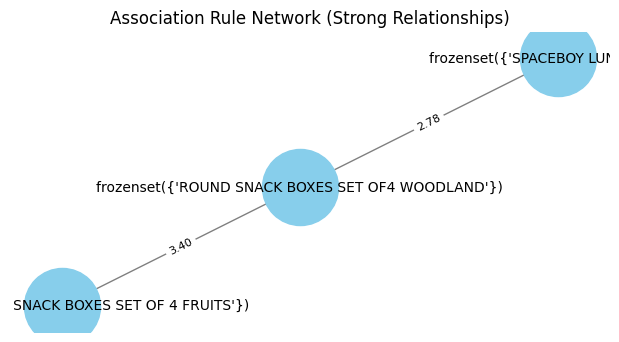

In [48]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph object
G = nx.Graph()

# Add edges based on strong relationships (Lift > 1, Confidence > 0.6)
for _, row in my_rules.iterrows():
    if row['lift'] > 1 and row['confidence'] > 0.6:
        G.add_edge(str(row['antecedents']), str(row['consequents']), weight=row['lift'])

# Draw the network
plt.figure(figsize=(6, 3))
pos = nx.spring_layout(G, k=0.5)
edges = nx.get_edge_attributes(G, 'weight')

nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=3000, edge_color='gray', font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.2f}" for k, v in edges.items()}, font_size=8)

plt.title("Association Rule Network (Strong Relationships)")
plt.show()

# Heatmap (Best for Strength of Relationship)

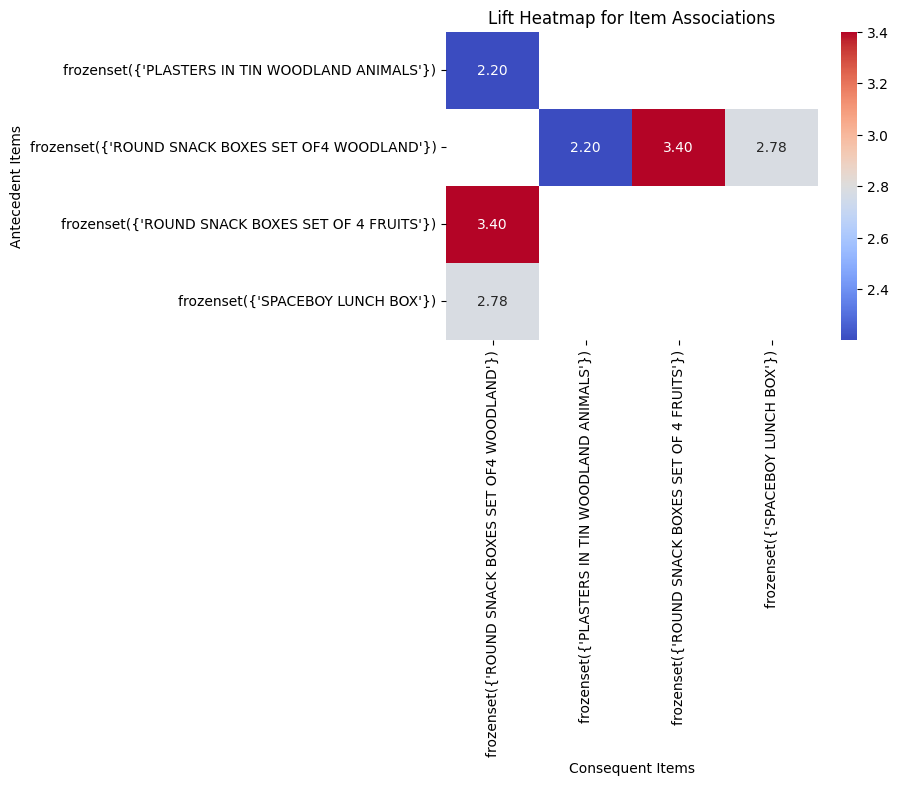

In [46]:
import seaborn as sns
import pandas as pd

# Create a pivot table for Lift values
heatmap_data = my_rules.pivot(index='antecedents', columns='consequents', values='lift')

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Lift Heatmap for Item Associations")
plt.xlabel("Consequent Items")
plt.ylabel("Antecedent Items")
plt.show()


# Bar Chart (Best for Sorting Strong vs. Weak Rules)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3108\3471345547.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_rules['lift'], y=[f"{a} → {c}" for a, c in zip(sorted_rules['antecedents'], sorted_rules['consequents'])], palette='viridis')


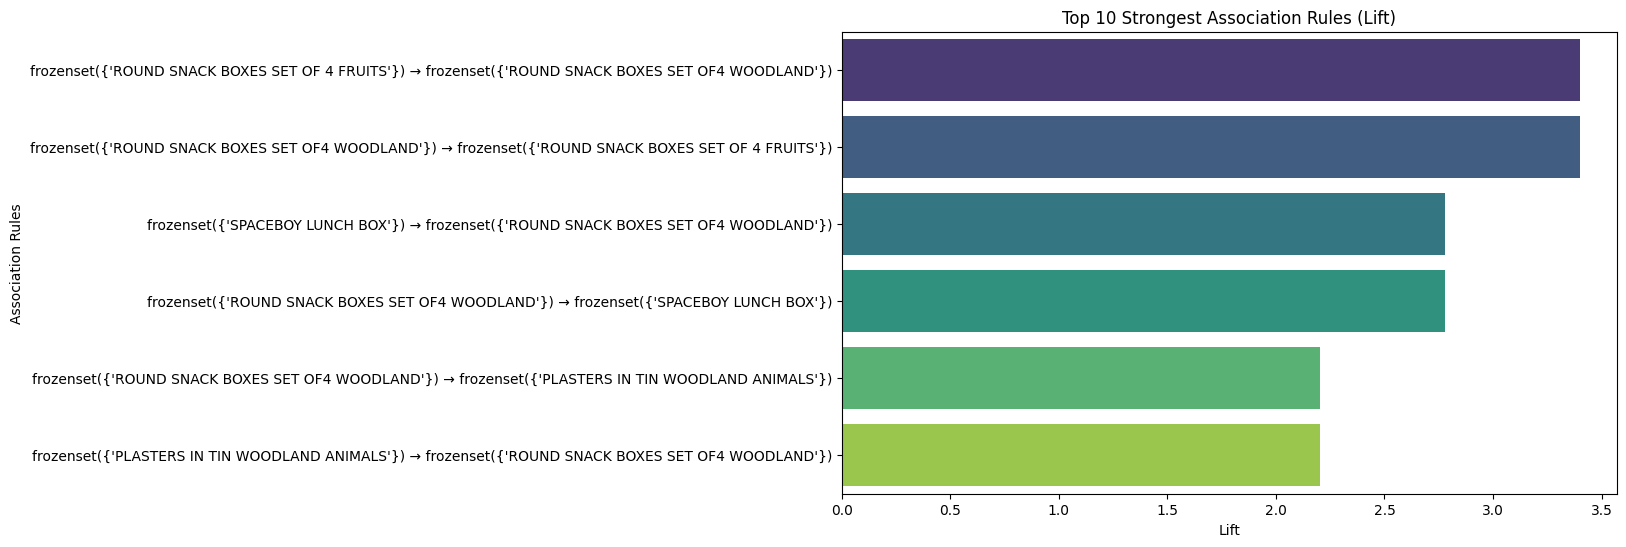

In [49]:
# Sort rules by Lift
sorted_rules = my_rules.sort_values(by='lift', ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_rules['lift'], y=[f"{a} → {c}" for a, c in zip(sorted_rules['antecedents'], sorted_rules['consequents'])], palette='viridis')
plt.xlabel("Lift")
plt.ylabel("Association Rules")
plt.title("Top 10 Strongest Association Rules (Lift)")
plt.show()


# Comparing strong vs. weak rules helps filter good recommendations.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3108\694409281.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=strong_rules['lift'], y=[f"{a} → {c}" for a, c in zip(strong_rules['antecedents'], strong_rules['consequents'])], palette='Blues')


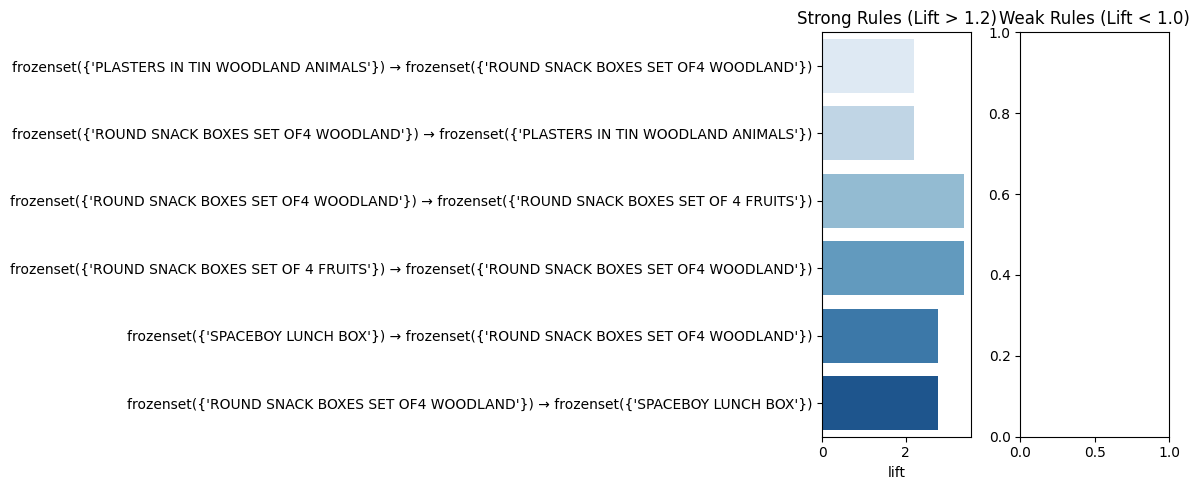

In [50]:
strong_rules = my_rules[my_rules['lift'] > 1.2]
weak_rules = my_rules[my_rules['lift'] < 1.0]

plt.figure(figsize=(12, 5))

# Strong relationships
plt.subplot(1, 2, 1)
sns.barplot(x=strong_rules['lift'], y=[f"{a} → {c}" for a, c in zip(strong_rules['antecedents'], strong_rules['consequents'])], palette='Blues')
plt.title("Strong Rules (Lift > 1.2)")

# Weak relationships
plt.subplot(1, 2, 2)
sns.barplot(x=weak_rules['lift'], y=[f"{a} → {c}" for a, c in zip(weak_rules['antecedents'], weak_rules['consequents'])], palette='Reds')
plt.title("Weak Rules (Lift < 1.0)")

plt.tight_layout()
plt.show()
